<h1 align="left">**Inferential Statistics** </h1>
<br>
<img src="../images/inferential.png" alt="Python" style="width: 400px;"/>

## Agenda for the Day
***
- Basic Probability
- Condition Probability
- Normal Distribution
- Central Limit Theorem

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

## Example Story : John's Search for a House 
***
- Well, buying a house is no joke. There are a number of factors one need to consider while selecting a particular house.

- One such factor is *Neighborhood*!

- John showed interest in Brooklyn which is 1 of 5 'boroughs' in New York

- Boroughs of New York City : Manhattan, Brooklyn, Queens, The Bronx, Staten Island.

- But it has several neighborhoods. Interestingly, like any big city, some are rich, some are poor, some are in the process of being gentrified, some are culturally diverse, etc. 

- John has displayed interest in several such neighborhoods and in addition to his 1460 observations, he found out the neighborhood of each and everyone of them! 

## Neighborhoods
***
<center><img src="../images/brooklyn.PNG" alt="Drawing" style="width: 650px;"/></center>

## John's Curiosity
***
- By just looking at the data, John sees interesting house prices in a neighborhood called "OldTown"

- He's curious about this Neighborhood and want's to see, for his own amusement, that if one was to pick a house at random, what were the chances that the house would be in OldTown


- Now, this is all a part of Basic Probability. Let's try and build our intuition on this first

## Basic Probability - Intuition
***

 - Let's start with a simple example: Say, we flip a fair coin
 
 - Intuitively, there's a 50% chance of getting heads, and a 50% chance of getting tails. This is because there are only two possible outcomes, and each event is equally likely.
 
 - Therefore, we can say that the **Probability** of getting a *Heads* is 0.5. Similarly, Probability of getting a *Tails* is 0.5 
 
 - **Probability can roughly be described as "the percentage chance of an event or sequence of events occurring".**


## Basic Probability - Intuition

Some common terms thrown around are: 

* **Experiment** – are the uncertain situations, which could have multiple outcomes. A coin toss is an experiment.
* **Outcome** is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is “Heads”
* **Event** is one or more outcomes from an experiment. “Tails” is one of the possible events for this experiment.
***
<center><img src="../images/Probability.PNG" alt="Drawing" style="width: 600px;"/></center>

## Get it? 
***
<center><img src="../images/meme_jim.jpg" alt="Drawing" style="width: 600px;"/></center>

## Basic Probability - Easy Rules
***
These are a list of some comprehensive rules Probability must follow: 

 - The Probability that nothing occurs is 0 
 - The Probability that something occurs is 1
 - The probability of something is 1 minus the probability that the opposite occurs
 
 - The probability of at least 1 of 2 (or more) things that can not simultaneously occur (mutually exclusive) is the sum of their respective probabilities
 
 - **"Mutually exclusive"** is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time. 

## Basic Probability - Easy Rules
***
 - For any 2 events the probability that at least one occurs is the sum of their probabilities minus their intersection
 
 **In-class Activity** 
 
 - The National Sleep Foundation reports that around 3% of the American population has sleep-breathing issues. They also report that around 10% of the American population has *restless leg syndrome*. Does this imply that 13% of people will have at least one sleep problems of these sorts?

Answer: No, the events can simultaneously occur and so are not mutually exclusive. To elaborate: 
***
<center><img src="../images/probaba.png" alt="Drawing" style="width: 600px;"/></center>

## Coming back to John
***
- Now John wants to check the Probability of picking a house in "OldTown"

- This is nothing but: 
   - No. of houses in OldTown/Total no. of houses
   
- Let's go through this in Python

In [4]:
all_houses = data.shape[0]
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print('Probability of picking a house in OldTown: {}'.format(houses_in_OldTown/all_houses))

Probability of picking a house in OldTown: 0.0773972602739726


Thus, from the output above we can state that: 

At random, the probability of choosing a house from the data set in the "OldTown" neighborhood is *0.077*

## What if John was extra curious? 
***

- Having found out the probability of picking a house from the "OldTown" neighborhood, what if John wanted to go further? 


- Even though this would be pretty redundant, but when picking **1 by 1**, what would be the probability of first picking a house from the "OldTown" neighborhood and then **AGAIN** picking a house from the **SAME** neighborhood? 


- This is nothing but Conditional Probability!

- This might sound a little complicated at first but let's break it down by starting with an easy example! 

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Conditional Probability - Intuition (1/2)
***
Let's say that we're eating some M&Ms. 

 - There are 10 M&Ms left in the bag: 5 are green, and 5 are blue.
 
 - What is the probability of getting 3 blue candies in a row? 
     - The probability of getting the first blue candy is 5/10, or 1/2. 
     - When we pick a blue candy, though, we remove it from the bag. We're left with **9** candies in total with (5-1 =)4 Blue ones.
     - So the probability of getting another blue is 4/9. 
     - Similarly, the probability of picking a third blue candy is 3/8
     
     

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Conditional Probability - Intuition (2/2)
***
- Since we're calculating the probability of picking 1 Blue Candy AND 1 Blue Candy AND 1 Blue Candy

    - Our final probability is 1/2 \* 4/9 \* 3/8, or .0833. So, there is an 8.3% chance of picking three blue candies in a row.
    
    
- **Simple tricks**: Whenever you have to *verbally* say AND (like we just did above), you will want to **MULTIPLY** the probabilities


- Whenever you have to *verbally* say OR, you will want to **ADD** the probabilities. 
    

## Can you solve this on your own? 
***
1) What is the probability of picking a green candy OR a blue candy?

2) Consider we have 7 green candies and 5 blue candies. What is the probability of picking (one by one, and without replacing) 2 green candies OR 2 blue candies? 

Answers : 

1) $(5/10)+(5/10)=1$

2) $(7/12)*(6/11)+(5/12)*(4/11)=(62/132)$


## Conditional Probability
***
To summarize, **Conditional probability is the probability of an  event A occurring, given that B has already occurred.**

- It is also denoted by:
***
<center><img src="../images/CP_1.PNG" alt="Drawing" style="width: 400px;"/></center>


## Conditional Probability
***
Coming back to John: 

 - What would be the probability of first picking a house from the "OldTown" neighborhood and then **AGAIN** picking a house from the **SAME** neighborhood?
 
 - Let's find this out in Python. 


In [5]:
## Enter condtional probability code
(houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1))

0.0059413935234303855

## Some Basic Concepts 
***
 - Before moving on to other questions John asked let's try and understand some basic concepts
 
 - We know what the outcome of an experiment is. 
 
 - Now, depending on the experiment, our outcome can have a range of possible values 
 
 - Each value has a specific, probability assigned to it. These probabilities may or may not be equal to one another
 
 - Now, like always, there is a Statistical Function that describes these values within a given range
 


## Some Basic Concepts
***
 - This is nothing but the Probability Distribution of the event
 
 - Confused? You're not the first..
 
 - Let's try and build some intuition with an easy example

## Simple Probability Distribution
***
 -  Lets try and plot a simple probability distribution
 
 - Let a random variable X be the sum of two fair six sided dice throws
 
 - X can take values (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
 
 - Can you figure our the proability of each value of X? 

<img src="../images/icon/Maths-Insight.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
## Simple Probability Distribution
***
- There are 6 possibilities in the first throw (we can get any number). We can get any no. from 1 to 6 

- 6 in the second

- Total no. of Combinations = 6\*6 = 36

Let’s see how:
2{(1,1)}  => 1/36

3{(1,2),(2,1)} => 2/36

4{(2,2),(3,1),(1,3)} => 3/36

5{(1,4),(4,1),(2,3),(3,2)} => 4/36

6{(3,3),(1,5),(5,1),(2,4),(4,2)} => 5/36

7{(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)} => 6/36

8{(2,6),(6,2),(3,5),(5,3),(4,4)} => 5/36

9{(3,6),(6,3),(5,4),(4,5)} => 4/36

10{(4,6),(6,4),(5,5)} => 3/36

11{(5,6),(6,5)} => 2/36

12{(6,6)} = > 1/36



## Plotting our results
When we plot the values [2,12] on the x-axis vs. the probability of getting each of these values as our Outcome we see the following: 
***
<center><img src="../images/Prob_dist.png" alt="Drawing" style="width: 500px;"/></center>


## In Case You Forgot (1/2)
***
 - A **discrete variable** is a variable whose value is obtained by counting
    - Examples:  number of students present, number of red marbles in a jar, number of heads when flipping three coins
    
 
 - A **continuous variable** is a variable whose value is obtained by measuring
    - Examples: height of students in class, weight of students in class, time it takes to get to school, distance traveled between classes
    

## In Case You Forgot (2/2)
***

- The probability function for a discrete random variable is the `probability mass function` and similarly if our random variable takes continuous values it is called a `probability density function`
 
 
 - Can you guess what we just plotted in the previous slide? 
 

## Some Basic Concepts
***
 - In the previous few slides we plotted the Probability Mass Function of a Discrete Random Variable (X which is the sum of two fair dies)
 
 - One of the most common Probability Distribution Functions is the Normal Distribution.
 
 - Let's learn some basic concepts on the Normal Distribution

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Normal Distribution (1/4)
***
 - Data can be "distributed" (spread out) in different ways
***
<center><img src="../images/norm1.png" alt="Drawing" style="width: 500px;"/></center>


<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Normal Distribution (2/4)
***
 - But there are many cases where the data tends to be around a central value with no bias left or right, and it gets close to a "Normal Distribution" like this:
***
<center><img src="../images/norm2.png" alt="Drawing" style="width: 500px;"/></center>


<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Normal Distribution (3/4)
***
 - It is known as a "Bell Curve" because it literally looks like a bell
 
 - Many things closely follow a Normal Distribution:
    - heights of people
    - size of things produced by machines
    - errors in measurements
    - blood pressure
    - marks on a test

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Normal Distribution (4/4)
***
 - We say that the data is "Normally Distributed" 
 
 - The Normal Distribution has:
    - mean = median = mode
    - symmetry about the center
    - 50% of values less than the mean 
    - and 50% greater than the mean
    - The total area under the curve is 1.

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Normal Distribution
***

<center><img src="../images/norm3.png" alt="Drawing" style="width: 500px;"/></center>
 

## Normal Distributions and Standard Deviations
***
 - The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. ... If the data points are further from the mean, there is a higher deviation within the data set; thus, the more spread out the data, the higher the standard deviation
 
 - When we calculate the standard deviation we find that (generally):
 
    - 68% of values are within 1 standard deviation	of the mean
    - 95% of values are within 2 standard deviations of the mean
    - 99.7% of values are within 3 standard deviations of the mean

![Normal distribution](../images/normal_distribution_0.jpeg)

<img src="../images/icon/Maths-Insight.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Math behind the Normal Distribution
***
- So how do we get a Bell Curve? 
- As discussed before, there is a Statistical Function that describes it's shape, just like any other graph in Mathematics

 ***
<center><img src="../images/norm4.png" alt="Drawing" style="width: 700px;"/></center>

## Looking at John's Data 
***
 - We know that John had the SalePrice data of the 1460 houses in Brooklyn
 
 - Let's plot a graph that shows us the SalePrice vs. the Frequency of that Price
 
 - Work it out in Python

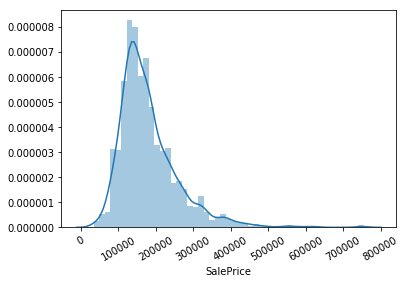

In [6]:
plt.xticks(rotation=30)
sns.distplot(data['SalePrice'])

## Thoughts 
***
The distribution is for our target variable aka SalePrice doesn't resemble a normal distribution, it is skewed to the left

 - This makes some sense since we already saw yesterday that we had a lot of Outliers on the upper-end of the Price scale
 
 - If you were to remove the outliers, it'd somewhat resemble a Normal Dstribution

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## The Concept of Z-score (1/5)
***
 - The number of standard deviations from the mean is also called the "Standard Score", "sigma" or "z-score". Get used to those words!
 

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
## The Concept of Z-score (2/5)
***
- As usual, let's build our intution with an Example
    - Consider that we're analyzing data of the heights (in meters) of students in a school 
    - The data is normally distributed as shown below:
 ***
<center><img src="../images/norm6.gif" alt="Drawing" style="width: 300px;"/></center>

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## The Concept of Z-score (3/5)
***
 - We can see that the mean = 1.4 meters
 - In that same school one of your friends is 1.85m tall
 - You can see on the bell curve that 1.85m is 3 standard deviations from the mean of 1.4, so:
 - **Your friend's height has a "z-score" of 3.0**
 


<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## The Concept of Z-score (4/5)
***
 - It is also possible to calculate how many standard deviations 1.85 is from the mean
      - How far is 1.85 from the mean?
      - It is 1.85 - 1.4 = 0.45m from the mean
 
 - Say that the Std. Dev. is pre-calculated and is = 0.15m
 
 - How many standard deviations is is it from the mean? The standard deviation is 0.15m, so:

     - = 0.45m / 0.15m = 3 standard deviations

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## The Concept of Z-score (5/5)
***
So to convert a value to a Standard Score ("z-score"):

 - first subtract the mean,
 - then divide by the Standard Deviation

And doing that is called "Standardizing":
 ***
<center><img src="../images/norm7.svg" alt="Drawing" style="width: 600px;"/></center>


## Normal Distribution makes its way to the Fashion Industry 
 ***
<center><img src="../images/norm5.jpg" alt="Drawing" style="width: 300px;"/></center>


## In Class Activity
***
Example: Travel Time

A survey of daily travel time had these results (in minutes):

26, 33, 65, 28, 34, 55, 25, 44, 50, 36, 26, 37, 43, 62, 35, 38, 45, 32, 28, 34

Convert the values to z-scores ("standard scores").

Don't forget:
 ***
<center><img src="../images/z-score.gif" alt="Drawing" style="width: 100px;"/></center>


# Introduction to Inference

## John's Random Experiment (1/2)
***
- So John is curious to experiment with his data, again! 

- He somehow thinks that 1460 is a lot of houses to look at! So he needs to narrow his search down a bit

- What he does is naive but he decides to just pick 500 houses at random 

## John's Random Experiment (2/2)
***

- But then he has a feeling that these houses don't truly represent the prices and features of the houses he had selected a while a go
- In simple words, he thought that these houses may be either too expensive, or too cheap as compared to the 500 
   - What he means is: The mean of the 500 houses would be pretty far away from the mean of the 1460 houses that he had calculated earlier

## Note
***
- We discussed that the Median would be a better measure but for the sake of simplicity of further calculations and concept-building, let's consider the Mean of all houses in the following cases

## John's 1st Simple Test
***
 - So John tests the mean of the 500 houses and compares it to the 1460 houses
 
 - What John has done, is nothing but build the basic concepts of Statistical Inference in himself! 

In [7]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=500) # Sample 500 values
print ("Sample mean:", sample_ages.mean() )                         # Show sample mean
print("Population mean:", data['SalePrice'].mean())  # Show population mean

Sample mean: 177499.802
Population mean: 180921.19589041095


## Statistical Inference
***
 - Let's try and understand the words "Sample" & "Population" as these will be used a lot in Statistics
 
 - Again, let's build our intuition with the help of some easy examples 
 
 
 - While analyzing data with statistical thinking, we are often interested in the characteristics of some large population
 

## Statistical Inference
***

- But **collecting data on the entire population may be infeasible**
 
      - For example, leading up to U.S. presidential elections it could be very useful to know the political leanings of every single eligible voter, 
      but surveying every voter is not feasible.
      - Instead, we could poll some subset of the population, such as a thousand registered voters, and use that data to make inferences about the 
      population as a whole.
      

## Statistical Inference
***
 - This *"subset"* of the population is nothing but the **Sample** data 
 
 - We carry out various tests on the Sample to gain insight on the larger population out there! 
 
 - Therefore Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between data samples.
 
 

## Statistical Inference
***
- In John's case, he is primarily concerned with the SalePrice of every house in Brooklyn 
    - Therefore, it's safe to assume that John's 1460 house prices is a **Sample** of the data 
    - The Population would be the price of **Every** house in Brooklyn 
    

 - But since John took a subset (i.e. 500) of the data from 1460 we can assume that: 
     - The 1460 Houses are the Population for the next few examples 
     - The 500 houses are the Sample

## Some Terminology: Point Estimates
***
Point estimates are estimates of population parameters based on sample data. 

* For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole.

* The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. 


## Point Estimates in John's Simple Test 
***
* John's point estimate based on a sample of 500 houses underestimates the true population mean by \$3,400, but it is close! 


* This illustrates an important point: *we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals*

## Terminology - Parameter & Statistic 
***
 - A parameter is a descriptive measure of the population.
    - Example: Population mean, Population variance etc.
- A statistic is a  descriptive measure of the sample.
    - Example: Sample mean, Sample variance etc.
     ***
<center><img src="../images/parstat.png" alt="Drawing" style="width: 500px;"/></center>


 ***
<center><img src="../images/sample2.png" alt="Drawing" style="width: 500px;"/></center>

## Don't try this at home
 ***
<center><img src="../images/sample.jpg" alt="Drawing" style="width: 300px;"/></center>


## Some Basic Concepts 2.0! 
***
 - Before moving on to other 'experiments' John performed with his data, let's try and uderstand some of the most commonly used concepts in Statistics
 
 - You might have heard about the term Central Limit Theorem before
 
 - Let's understand what it means and its relevance

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

### Central Limit Theorem  - Important! (1/2) 
***
 - The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the `mean` of all samples from the same population will be approximately equal to the `mean` of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

### Central Limit Theorem  - Important! (2/2)
***
- According to the central limit theorem, the mean of a sample of data will be closer to the mean of the overall population in question as the sample size increases, notwithstanding the actual distribution of the data, and whether it is normal or non-normal. As a general rule, sample sizes equal to or greater than 30 are considered sufficient for the central limit theorem to hold, meaning the distribution of the sample means is fairly normally distributed.

## Video on the CLT
***
- This is a very nice and intuitive video on the CLT 

In [8]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/JNm3M9cqWyc" frameborder="0" allowfullscreen></iframe>')

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Central Limit Theorem - Important (1/2)
***
* Many practices in statistics, such as those involving hypothesis testing or confidence intervals, make some assumptions concerning the population that the data was obtained from.

* One assumption that is initially made in a statistics course is that the populations that we work with are normally distributed.

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Central Limit Theorem - Important (2/2)
***

* The assumption that data is from a normal distribution simplifies matters but seems a little unrealistic.

* Just a little work with some real-world data shows that outliers, skewness, multiple peaks and asymmetry show up quite routinely like the one John encountered with `SalePrice` above.

* We can get around the problem of data from a population that is not normal. 

* The use of an appropriate sample size and the central limit theorem help us to get around the problem of data from populations that are not normal.

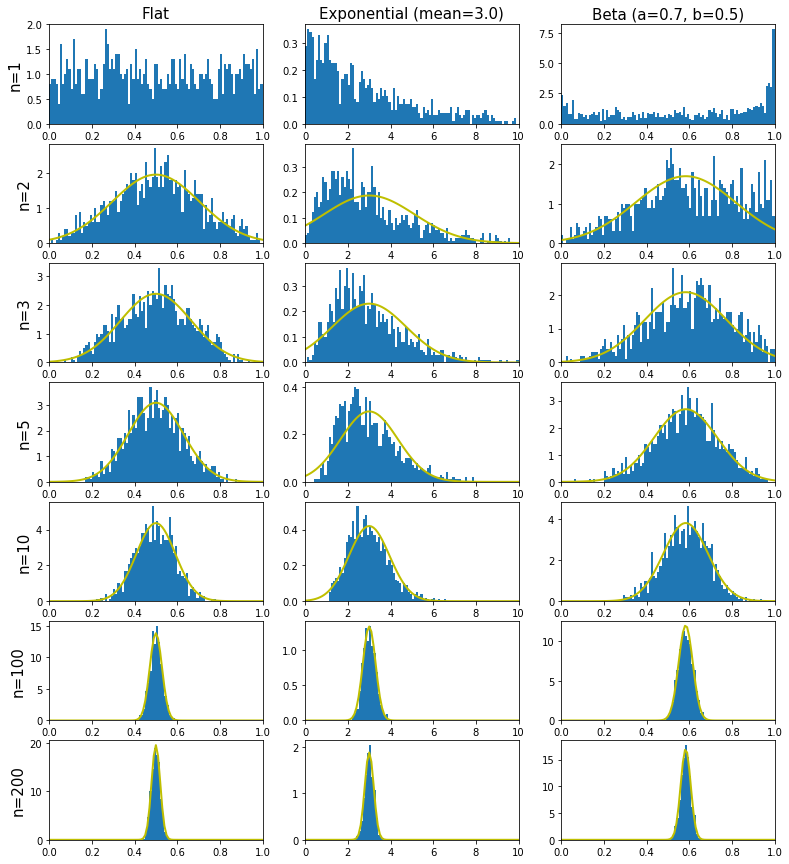

In [9]:
from functools import partial # provides capability to define function with partial arguments

N=1000 # number of times n samples are taken. Try varying this number.
nobb=101 # number of bin boundaries on plots
n=np.array([1,2,3,5,10,100, 200]) # number of samples to average over

exp_mean=3 # mean of exponential distribution
a,b=0.7,0.5 # parameters of beta distribution

dist=[partial(np.random.random),partial(np.random.exponential,exp_mean),partial(np.random.beta,a,b)]
title_names=["Flat", "Exponential (mean=%.1f)" % exp_mean, "Beta (a=%.1f, b=%.1f)" % (a,b)]
drange=np.array([[0,1],[0,10],[0,1]]) # ranges of distributions
means=np.array([0.5,exp_mean,a/(a+b)]) # means of distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) # variances of distributions

binrange=np.array([np.linspace(p,q,nobb) for p,q in drange])
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

for i in range(ln): # loop over number of n samples to average over
    for j in range(ld): # loop over the different distributions
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],normed=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()

In the graphs above the yellow curve is the predicted Gaussian distribution from the Central Limit Thereom. Notice that the rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. Also, 

- the mean of the Gaussian distribution is the same as the original parent distribution,
- the width of the Gaussian distribution scales as $1/\sqrt{n}$.




## In Class Activity
***
In order to understand the Central Limit Theorem and understand why distribution of  sample means is normally distributed, try tinkering around the below shiny app. Change the Parent Distribution, sample size and no of samples and see how CLT helps us make inferences about the population statistics even when the population isn't normal.


https://gallery.shinyapps.io/CLT_mean/



<img src="../images/icon/Recap.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

# In-session Recap Time
***
* Basic Probability Intuition
* Conditional Probability
* Normal Distribution and Standard Deviation
* Z-Score & Central Limit Theorem

# Post Reads
***
* [A more mathematical treatment of probability theory for adventurous students](http://www.sci.utah.edu/~gerig/CS6640-F2010/prob-tut.pdf)
* [The Central Limit Theorem {Clear Statistics}](https://medium.com/@chelseaparlett/the-central-limit-theorem-clear-statistics-278b80fd6f9f)
* [Central Limit Theorem at work](https://medium.com/@mtterribile/central-limit-theorem-at-work-a0de13df37dc)
* [Blackjack Simulations and the Central Limit Theorem](https://medium.com/@andrewadelson/using-monte-carlo-to-answer-a-blackjack-question-part-2-827260ddd2b8)

# Thank You
***
For more queries -  Please visit https://seekho.ai